# 线性回归

author: Kujou Kazuya

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

线性回归是一种统计分析方法，用来确定两种或两种以上变量之间的定量关系。线性回归的基本形式是 $y = wx + b$，其中y是因变量，x是自变量，w是回归系数，b是偏移值。

本部分实验采用“经验-工资”数据集。

### 1. 导入数据 

In [2]:
import pandas as pd

data = pd.read_csv("Salary_Data.csv")  # 读取数据集，index_col=0表示第一列是索引

### 2. 观测数据集

为了获得对数据集的整体感知，我们首先使用`head`函数观测数据集的前五条数据，然后使用`describe`函数观测数据集的数值分布信息，最后绘制出样本的散点图。

In [3]:
data.head()  # Print the first 5 rows of the dataframe

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.describe()  # prints a summary of the data

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


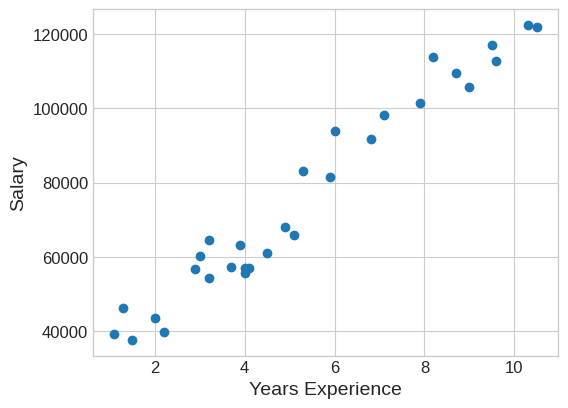

In [5]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(6, 4.5))

plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.scatter(data["YearsExperience"], data["Salary"])

### 3. 划分训练集和测试集

我们在训练集上训练模型，然后在测试集上评估样本的准确度，因为我们需要知道模型的泛化能力，以确定模型是否存在过拟合现象。实际的项目还应该采用交叉验证法设立验证集，但我们的数据集样本较小（是一个玩具样本集），因此省略验证集。

In [6]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
train_set, test_set = train_test_split(data, test_size=0.4, random_state=42)

In [7]:
X_train, y_train = train_set["YearsExperience"], train_set["Salary"]
X_test, y_test = test_set["YearsExperience"], test_set["Salary"]
X_train = X_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy()
X_test = X_test.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy()

### 4. 模型训练

我们先采用 `scikit-learn` 中的 `LinearRegression` 进行模型训练。

In [8]:
from sklearn.linear_model import LinearRegression
from time import time

model = LinearRegression()
start_time = time()
model.fit(X_train, y_train)
end_time = time() - start_time
print(f"Training time: {end_time:.4f} seconds")

Training time: 0.0014 seconds


### 5. 模型参数值

我们可以使用 `coef_` 和 `intercept_` 属性获取模型参数值。

In [9]:
coef = model.coef_
intercept = model.intercept_
print(f"coef: {coef[0]}, intercept: {intercept}")

coef: 9284.878351817762, intercept: 26806.601413653698


因此，我们的模型为
$$\hat{y}=24380.2015 + 9423.8153x,$$
其中 x 为输入工作经验时长， $\hat{y}$ 是对薪水的预测值。

### 6. 模型可视化

线性模型可以通过直线来表示。我们将 1.5 节得到的公式画在训练集的散点图上，观察样本和模型的偏离程度。

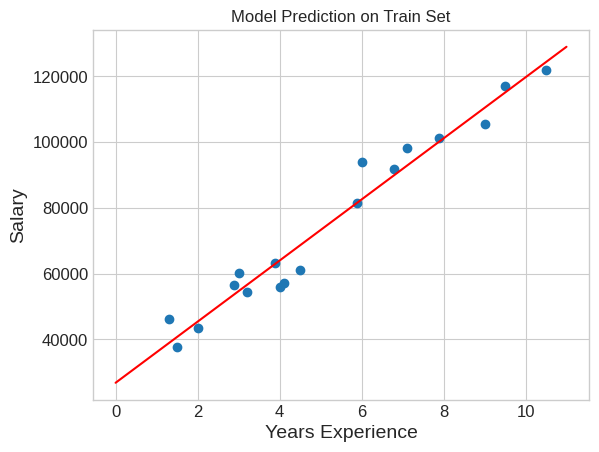

In [10]:
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Model Prediction on Train Set")
plt.scatter(X_train, y_train)
x_plot = [[0], [11]]
y_plot = model.predict(x_plot)
plt.plot(x_plot, y_plot, color="red")

### 7. 模型预测与评估

我们分别对训练集和测试集上的数据进行模型预测。选用**均方差**和**标准差**和**相关系数**作为评测指标。

- 如果在训练集和测试集上的方差相差不多，且都比较小，则可说明模型的泛化能力较强。
- 如果在训练集和测试集上的方差相差不多，但都比较大，则可说明模型本身不适合该数据集，出现了欠拟合现象。
- 如果在训练集上的方差较小，但在测试集上方差较大，则可说明模型的范化能力能力弱，出现了过拟合现象。

In [11]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

mse_train = mean_squared_error(y_train_pred, y_train)
mse_test = mean_squared_error(y_test_pred, y_test)
r_train = pearsonr(y_train_pred, y_train)
r_test = pearsonr(y_test_pred, y_test)
print(
    f"Train MSE: {mse_train:0.4f}\n"
    f"Test MSE: {mse_test:0.4f}\n"
    f"Train RMSE: {mse_train**0.5:0.4f}\n"
    f"Test RMSE: {mse_test**0.5:0.4f}\n"
    f"Train Pearson's r: {r_train[0]:0.4f}\n"
    f"Test Pearson's r: {r_test[0]:0.4f}"
)

Train MSE: 27258333.2643
Test MSE: 37867393.3889
Train RMSE: 5220.9514
Test RMSE: 6153.6488
Train Pearson's r: 0.9794
Test Pearson's r: 0.9772


我们发现我们的线性模型在训练集和测试集上的效果相差无几，且预测值都与真实值有很大的相关系数。所以认为该模型泛化能力较好。